In [319]:
import pandas as pd 
import numpy as np 
import utils.data_prepare as dp 
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent="example app")

def get_geopy_data(address):
    if geolocator.geocode(address):
        lat, lon, p = geolocator.geocode(address).point
        return [lat, lon]
    else: 
        return "can't find"

moskwa = [55.751244, 37.618423] 

In [320]:
train = pd.read_hdf('data/property.train.h5')

In [359]:
metro_stations = pd.DataFrame({
"breadcrumbs_MCK":[
         "МЦК Крымская","МЦК Кутузовская","МЦК Шелепиха","МЦК Лужники","МЦК Коптево","МЦК Хорошёво",
         "МЦК ЗИЛ","МЦК Шоссе Энтузиастов","МЦК Нижегородская","МЦК Угрешская","МЦК Владыкино",
         "МЦК Лихоборы","МЦК Ботанический сад","МЦК Балтийская","МЦК Зорге","МЦК Ростокино",
         "МЦК Локомотив","МЦК Деловой центр","МЦК Андроновка","МЦК Новохохловская","МЦК Соколиная Гора",
         "МЦК Стрешнево","МЦК Площадь Гагарина","МЦК Окружная","МЦК Панфиловская","МЦК Верхние Котлы",
         "МЦК Дубровка","МЦК Бульвар Рокоссовского","МЦК Автозаводская","МЦК Белокаменная","МЦК Измайлово"
        ],
 "N_cat"    :[
     55.689996,55.739723,55.759055,55.720938,55.8339615,55.777063,
     55.697998,55.758903,55.732153,55.7172056,55.8460453,
     55.8461625,55.8456095,55.8245848,55.7889196,55.84286,
     55.8032813,55.7477698,55.7459043,55.7240081,55.7715129,
     55.813731,55.706997,55.8488708,55.7990171,55.690124,
     55.7126485,55.817222,55.706525,55.8247339,55.7884887
 ],
 "E_cat"    :[
     37.6030233,37.5322383,37.5204276,37.5578673,37.5095698,37.5052353,
     37.6455663,37.7438224,37.7259292,37.694126,37.5871309,
     37.57181,37.6375244,37.4928893,37.5017478,37.6630943,
     37.7431398,37.5298063,37.7356328,37.7143756,37.7429271,
     37.4848013,37.5841133,37.5699377,37.4967285,37.6165353,
     37.675508,37.7347544,37.6612083,37.6935242,37.7423137     
 ]}) 
 

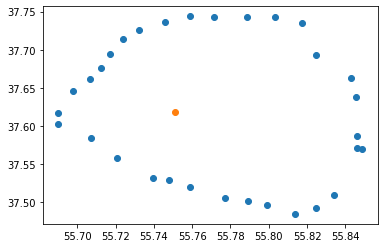

In [360]:
import matplotlib.pyplot as plt
plt.scatter(x=metro_stations['N_cat'], y=metro_stations['E_cat'])
plt.scatter(x=moskwa[0], y=moskwa[1])
plt.show()

In [361]:
#moskwa jako środek układu współżednych: 
metro_stations['latitude'] = [(l - moskwa[0])*10 for l in metro_stations['N_cat']]
metro_stations['longitude'] = [(l - moskwa[1])* 10 for l in metro_stations['E_cat']]

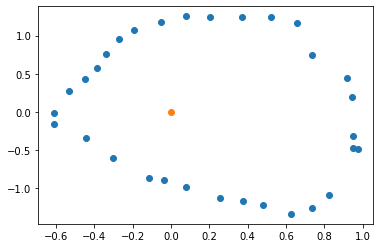

In [362]:
plt.scatter(x=metro_stations['latitude'], y=metro_stations['longitude'])
plt.scatter(x=0, y=0)
plt.show()

In [363]:
metro_dict = {} 

In [364]:
for m,lat,lon in zip(metro_stations['breadcrumbs_MCK'], metro_stations['latitude'],metro_stations['longitude']):
    metro_dict[m] = (lat,lon)

In [365]:
metro_dict

{'МЦК Крымская': (-0.6124799999999908, -0.15399700000003236),
 'МЦК Кутузовская': (-0.11521000000001891, -0.8618469999999689),
 'МЦК Шелепиха': (0.07810999999996682, -0.9799540000000206),
 'МЦК Лужники': (-0.3030600000000305, -0.6055570000000188),
 'МЦК Коптево': (0.8271750000000111, -1.0885319999999865),
 'МЦК Хорошёво': (0.2581899999999848, -1.1318769999999745),
 'МЦК ЗИЛ': (-0.5324600000000146, 0.2714329999999876),
 'МЦК Шоссе Энтузиастов': (0.07658999999996752, 1.2539939999999916),
 'МЦК Нижегородская': (-0.19091000000003078, 1.075062000000031),
 'МЦК Угрешская': (-0.34038400000000024, 0.7570299999999719),
 'МЦК Владыкино': (0.9480130000000031, -0.3129210000000171),
 'МЦК Лихоборы': (0.9491849999999857, -0.4661300000000068),
 'МЦК Ботанический сад': (0.943655000000021, 0.19101399999996715),
 'МЦК Балтийская': (0.7334079999999688, -1.255336999999983),
 'МЦК Зорге': (0.3767560000000003, -1.1667520000000309),
 'МЦК Ростокино': (0.9161600000000192, 0.44671299999997416),
 'МЦК Локомотив

In [334]:
import json
with open("mo.geojson") as f:
    data = json.load(f)

3

In [349]:
gminy = []
okregi = [] 
latitude = []
longitude = []
for elem in data['features']: 
    gminy.append(elem["properties"]['NAME'])
    okregi.append(elem["properties"]['NAME_AO'])
    if elem["geometry"]["type"] == "MultiPolygon": 
        coor = elem["geometry"]["coordinates"][0][0]
    if elem["geometry"]["type"] == "Polygon": 
        coor = elem["geometry"]["coordinates"][0]
    lat = (np.mean ([e[0] for e in coor]) - moskwa[1]) * 10
    lon = (np.mean ([e[1] for e in coor]) - moskwa[0]) * 10 
    latitude.append(lat)
    longitude.append(lon)

gminy_dict = {}
for g,lat,lon in zip(gminy,latitude,longitude):
    gminy_dict[g] = [lat,lon]

In [380]:
gminy_dict

{'Киевский': [-7.1140551724138135, -3.592447241379375],
 'Филёвский Парк': [-1.4509627433628935, -0.02548955752210702],
 'Новофёдоровское': [-6.466144558472564, -3.309073651551273],
 'Роговское': [-5.844214636871499, -5.234952290502761],
 '"Мосрентген"': [-1.511642962963009, -1.3029316666666801],
 'Вороновское': [-4.8073704958677865, -4.267848471074345],
 'Михайлово-Ярцевское': [-4.870186422018321, -3.514045963302692],
 'Марушкинское': [-4.264188360655723, -1.7236114754097542],
 'Первомайское': [-3.7669622888282817, -2.357037820163441],
 'Матушкино': [-4.145783804347829, 2.502375217391304],
 'Внуково': [-3.207172940038774, -1.3772092456479612],
 'Савёлки': [-3.794947863397553, 2.2913286514886266],
 'Внуковское': [-3.2105582094595064, -1.2101349324323962],
 'Силино': [-4.3215198550724665, 2.473832463768204],
 'Кокошкино': [-4.5681556544503366, -1.5754857242583142],
 'Крюково': [-4.375590873786379, 2.0658821359223367],
 'Щукино': [-1.4296108823528897, 0.4681960294117715],
 'Краснопахорск

In [352]:
def array_to_str(array):
    result = [",".join([str(elem) for elem in array])][0]
    if result !='':
        return result.strip()
    else:
        return None

def split_elements_by_prefix (array):
    elem_with_prefix = [] 
    elem_without_prefix = [] 
    for elem in array: 
        split_elem = elem.split('.')
        if len(split_elem) > 1: 
            elem_with_prefix.append(split_elem[1].strip())
        else: 
            elem_without_prefix.append(split_elem[0])
    return elem_with_prefix, elem_without_prefix 

def get_object(array,obj):
    result = [str(elem) for elem in array if obj in elem]
    if len(result)>0:
        array = [elem for elem in array if elem not in result]
        return array_to_str(result), array
    else:
        return None, array

def get_elems(array):
    if 'Москва' in array: 
        array.remove('Москва')
    if 'г. Москва' in array:
        array.remove('г. Москва')
    nova_mockba,array = get_object(array,'Новая Москва')
    mck,array = get_object(array,'МЦК ') 
    m, array = get_object(array,'м. ') 

    elem_with_prefix, elem_without_prefix  = split_elements_by_prefix (array)
    return nova_mockba,mck,m, elem_with_prefix, elem_without_prefix 

def check_elem_on_list(array,set_):
    if len(array)>0:
        return array_to_str([elem for elem in array if elem in set_])

In [353]:
b = [get_elems(array) for array in train.breadcrumbs]

In [354]:
df = pd.DataFrame(data=b,columns= ['nowa_moskwa','metro','m','with_prefix','without_prefix'])

In [355]:
df['gminy'] = [check_elem_on_list(elem,gminy) for elem in df['without_prefix']]

In [377]:
df['lat_lon'] = [lat_lon(elem_g,elem_m) for elem_g,elem_m in zip(df.gminy,df.metro)]  

In [378]:
df

,nowa_moskwa,metro,m,with_prefix,without_prefix,gminy,lat_lon
0,None,МЦК Лужники,None,[],[],None,"(-0.3030600000000305, -0.6055570000000188)"
1,Новая Москва,МЦК Крымская,м. Бунинская Аллея,"[Сосенское, Коммунарка]",[Южное Бутово],Южное Бутово,"[-1.064900136108875, -2.248217902321983]"
2,None,МЦК Крымская,None,[Поляны],[],None,"(-0.6124799999999908, -0.15399700000003236)"
3,None,МЦК Хорошёво,м. Динамо,[],[Беговой],Беговой,"[-0.5066019008264533, 0.2991476033057694]"
4,None,МЦК Шелепиха,м. Фили,[],[Филёвский Парк],Филёвский Парк,"[-1.4509627433628935, -0.02548955752210702]"
...,...,...,...,...,...,...,...
45689,None,МЦК Лужники,м. Говорово,[],[Солнцево],Солнцево,"[-2.2045360869564945, -1.086002318840542]"
45690,None,МЦК Кутузовская,None,[],[],None,"(-0.11521000000001891, -0.8618469999999689)"
45691,None,МЦК Нижегородская,м. Новокосино,[],[Новогиреево],Новогиреево,"[1.8611088888889782, -0.027997936507873078]"
45692,None,МЦК Бульвар Рокоссовского,None,[],[],None,"(0.659780000000012, 1.1633139999999997)"
